# Visualization Collection


This jupyter notebook contains visualizations for the following experiments:

1. Query Length
2. Zipf's Law

### 1. Query Length  
In this experiment, the query length of the involved data sets is investigated. It is measured in chars as well as in words. For the extraction of words, a tokenizer from spacy was applied. 


To get started, lets define some configuration for our visualization:

In [3]:
from thesis_schneg.model import DatasetName, AnalysisName

##### set visualization configuration #####

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
dataset: DatasetName = None 
# dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# set analysis that should be visualized
analysis_name: AnalysisName = 'query-length-chars'
# analysis_name: AnalysisName = 'query-length-words'


# load visualization parametes into dictionary
if analysis_name == 'query-length-chars':
    vis_params = {"dataset-col-x": "query-length-chars", "dataset-col-y": "count()", "x-label": "Number of characters", "y-label": "Relative frequency", "x-lim": (0, 50), "y-lim": None, "title": "Query length in characters"}
elif analysis_name == 'query-length-words':
    vis_params = {"dataset-col-x": "query-length-words", "dataset-col-y": "count()", "x-label": "Number of words", "y-label": "Relative frequency", "x-lim": (0, 20), "y-lim": None, "title": "Query length in words"}

Now we can start the visualization. If no explicit dataset was selected, a joint plot of the results of all datasets is created

AttributeError: 'function' object has no attribute 'get_frame'

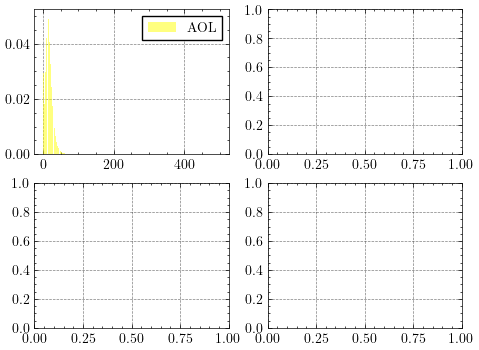

In [4]:
from thesis_schneg.vis_modules import _get_results_paths, load_results, bar_plot
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib

# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization
# vis_dir = Path(
#         f"/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/plots/{analysis_name}") 
vis_dir = Path(
        f"/home/benjamin/studium/masterarbeit/thesis-schneg/thesis/plots/{analysis_name}")

# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create visualization for all data sets if dataset is not specified
if dataset is None:
    # set size of plot
    textwidth = 5.5129
    aspect_ratio = 6/8
    scale = 1.0
    width = textwidth * scale
    height = width * aspect_ratio

    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
        "aol", "ms-marco", "orcas", "aql"]}

    # create subplots for each dataset
    fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(width, height))

    # counter for datasets
    cnt_datasets = 0

    # color palette for datasets
    color = ['yellow', 'orange', 'red', 'purple']

    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        vis_data = load_results(result_paths)
        # modify data -> create relative frequency
        vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]]/vis_data[vis_params["dataset-col-y"]].sum()
        # apply specific visualization function
        fig, ax[int(cnt_datasets/2), cnt_datasets%2] = bar_plot(data=vis_data, subplots=(fig, ax[int(cnt_datasets/2), cnt_datasets%2]),
                                            vis_params=vis_params, label=name.upper(), color=color[cnt_datasets])
        cnt_datasets += 1
    
    # create title
    fig.suptitle(
        f'{vis_params["title"]} across multiple Datasets')
    
    # make layout tight
    plt.tight_layout()

    # either save visualization or show it  
    if save_vis:
        fig.savefig(vis_dir.joinpath("all.pgf"))
    else:
        plt.show()

# create visualization for a specific data set:
else:  

    # enable pgf format for matplotlib
    if save_vis:
        matplotlib.use("pgf")

    # set size of plot
    textwidth = 5.5129
    aspect_ratio = 6/8
    scale = 1.0
    width = textwidth * scale
    height = width * aspect_ratio

    # use science style for plots from scienceplots library
    plt.style.use(["science", "grid"])

    # modify title
    vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

    # create subplot for dataset
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(width, height))

    # get result data
    result_paths = _get_results_paths(dataset, analysis_name)
    vis_data = load_results(result_paths) 
    # modify data -> create relative frequency
    vis_data[vis_params["dataset-col-y"]] = vis_data[vis_params["dataset-col-y"]]/vis_data[vis_params["dataset-col-y"]].sum()
    # apply specific visualization function
    fig, ax = bar_plot(data=vis_data, subplots=(fig, ax),
                        vis_params=vis_params)
    
    # make layout tight
    plt.tight_layout()
    
    # either save visualization or show it
    if save_vis:
        fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        plt.show()




### 2. Zipf's Law
Zipf's law is an empirical law that applies to natural languages. It states that the frequency of e.g. words or characters follows, after being sorted in descending order, an inversely proportional distribution. The data collected for this experiment contains frequencies of words as well as characters from the involved data sets. Note that the frequencies of words was only collected from the english subset of all queries. In particular, data from *MS-Marco* and *AQL* is manipulated by the filter.

Again, we first define a configuration for our visualizaton:

In [6]:
from thesis_schneg.model import DatasetName, AnalysisName

##### set visualization configuration #####

# save visualization or not
save_vis: bool = False
# save_vis: bool = True

# select dataset (if none is selected all datasets are visualized in a joint plot) 
# dataset: DatasetName = None 
dataset: DatasetName = 'aol'
# dataset: DatasetName = 'aql'
# dataset: DatasetName = 'ms-marco'
# dataset: DatasetName = 'orcas'

# set analysis that should be visualized
# analysis_name: AnalysisName = 'zipfs-law-chars'
analysis_name: AnalysisName = 'zipfs-law-words'


# load visualization parametes into dictionary
if analysis_name == 'zipfs-law-chars':
    vis_params = {"dataset-col-x": "char", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's Law for characters"}
elif analysis_name == 'zipfs-law-words':
    vis_params = {"dataset-col-x": "word", "dataset-col-y": "count()", "x-label": "Rank", "y-label": "Frequency", "x-lim": None, "y-lim": None, "title": "Zipf's law for words"}


Start the visualization:

In [7]:
from thesis_schneg.vis_modules import _get_results_paths, load_results, log_plot
from pathlib import Path
from matplotlib import pyplot as plt
import matplotlib

# latex rendering for matplotlib
matplotlib.rcParams.update(
    {
        "pgf.texsystem": "pdflatex",
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
    }
)

# set path to save visualization
# vis_dir = Path(
#         f"/mnt/ceph/storage/data-in-progress/data-teaching/theses/thesis-schneg/plots/{analysis_name}")
vis_dir = Path(
        f"/home/benjamin/studium/masterarbeit/thesis-schneg/thesis/plots/{analysis_name}")
# make directory if it does not exist
if not vis_dir.exists() and save_vis:
        vis_dir.mkdir(parents=True)

# enable pgf format for matplotlib
if save_vis:
    matplotlib.use("pgf")
# use science style for plots from scienceplots library
plt.style.use(["science", "grid"])

# create visualization for all data sets if dataset is not specified
if dataset is None:
    # crawl files from all datasets and load into dictionary
    paths = {f"{name}": _get_results_paths(name, analysis_name) for name in [
        "aol", "ms-marco", "orcas", "aql"]}

    # create subplots for each dataset
    fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(16, 4))

    # counter for datasets
    cnt_datasets = 0

    # color palette for datasets
    color = ['yellow', 'orange', 'red', 'purple']

    # iterate over datasets and create visualization
    for name, result_paths in paths.items():
        vis_data = load_results(result_paths)
        # apply specific visualization function
        fig, ax[cnt_datasets] = log_plot(data=vis_data, subplots=(fig, ax[cnt_datasets]),
                                            vis_params=vis_params, label=name.upper(), color=color[cnt_datasets])
        cnt_datasets += 1
    
    # create title
    fig.suptitle(
        f'{vis_params["title"]} across multiple Datasets', fontsize=16)
    
    # make layout tight
    plt.tight_layout()

    # either save visualization or show it  
    if save_vis:
        fig.savefig(vis_dir.joinpath("all.pgf"))
    else:
        plt.show()

# create visualization for a specific data set:
else:  

    # enable pgf format for matplotlib
    if save_vis:
        matplotlib.use("pgf")

    # use science style for plots from scienceplots library
    plt.style.use(["science", "grid"])

    # modify title
    vis_params["title"] = f'{vis_params["title"]} ({dataset.upper()})'

    # create subplot for dataset
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 6))

    # get result data
    result_paths = _get_results_paths(dataset, analysis_name)
    vis_data = load_results(result_paths) 

    # apply specific visualization function
    fig, ax = log_plot(data=vis_data, subplots=(fig, ax),
                        vis_params=vis_params)
    
    # make layout tight
    plt.tight_layout()
    
    # either save visualization or show it
    if save_vis:
        fig.savefig(vis_dir.joinpath(f"{dataset}.pgf"))
    else:
        plt.show()




/tmp/ipykernel_82909/557960037.py:98: UserWarning: FigureCanvasPgf is non-interactive, and thus cannot be shown
  plt.show()
